# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control, WS18

# 02 - Matrices

In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

### Markov chains

During the lecture, we saw an example of finding a fixed point of a Markov chain by finding the eigenvectors of the transition matrix. Let's now first verify that the found vector is indeed a fixed point of the chain. Write a function that iterates the chain for $100$ iterations and print the resulting state vector.

In [4]:
def iterate_chain(T, x0, n):
    x = np.array(x0)
    
    # write your code here
    for i in range(n):
        x=np.dot(T,x)
        
        

    return x

T = np.array([[3/5., 2/5., 2/5.], [1/5., 3/5., 1/5.], [1/5., 0., 2/5.]])
x0 = np.array([1., 0., 0.])[np.newaxis].T
n = 100
x = iterate_chain(T, x0, n)
print(x)

[[0.5       ]
 [0.33333333]
 [0.16666667]]


Let's now repeat the problem from the lecture, namely find the eigenvectors of the Markov chain and take the one correspoding to the eigenvalue $\lambda = 1$, which is the fixed point. Write a function that returns the eigenvalues and the eigenvectors of the Markov matrix and a function that extracts the eigenvector corresponding to $\lambda = 1$.

In [12]:
def get_chain_eigenvalues_and_eigenvectors(T):
    # write your code here
    return np.linalg.eig(T)

def extract_fixed_point(eigenvalues, eigenvectors):
    # write your code here
    fp=eigenvectors[:,np.where(np.abs(eigenvalues-1)<1e-5)[0][0]]
    return fp

eigenvalues, eigenvectors = get_chain_eigenvalues_and_eigenvectors(T)
#print (eigenvalues)
#print (eigenvectors)
fixed_point = extract_fixed_point(eigenvalues, eigenvectors)
print(fixed_point)

[-0.80178373 -0.53452248 -0.26726124]


As you can see, the resulting vector doesn't look like the fixed point; as a matter of fact, the vector is not even a valid probability vector (i.e. the entries are not positive and they don't sum to $1$), so what has gone wrong?

Well, nothing actually. What we should note is that - mathematically speaking - this vector and our desired fixed point are the same. Recall that a vector is defined as having a direction and magnitude; its absolute position in space doesn't have a mathematical meaning.

That's all nice in theory, but what about practicality? In order to find the fixed point of the Markov chain numerically, we need a procedure that converts the eigenvector corresponding to $\lambda = 1$ returned by numpy to a valid probability vector. Write a function that does this conversion and verify that the resulting vector is the same as the vector obtained by explicitly iterating the Markov chain.

In [13]:
def convert_to_probability_vector(vector):
    p = np.array(vector)

    # write your code here

    return p/np.sum(vector)

fixed_point = convert_to_probability_vector(fixed_point)
print(fixed_point)
assert np.linalg.norm(fixed_point - np.squeeze(x)) < 1e-5

[0.5        0.33333333 0.16666667]


### Matrix diagonalisation

One application of eigenvectors is matrix diagonalisation. The idea behind matrix diagonalisation is the following: We already know that each eigenvector is defined as $A\mathbf{x} = \lambda\mathbf{x}$. If all eigenvectors $\mathbf{x}_1, ..., \mathbf{x}_n$ are put in the columns of a matrix $S$ and the eigenvalues $\lambda_1, ..., \lambda_n$ in a diagonal matrix $\Lambda$, we obtain the equation $AS = S \Lambda$; you can verify for yourself that the $i-th$ column of $AS$ is equal ot $A\mathbf{x}_i$ and the $i-th$ column of $S \Lambda$ is equal to $\lambda_i \mathbf{x_i}$, so this gives us a concise way of writing down $A\mathbf{x} = \lambda\mathbf{x}$ for each eigenvalue and eigenvector. Now, if we multiply $AS = S\Lambda$ by $S^{-1}$ on the right side, we obtain

\begin{equation*}
    ASS^{-1} = S \Lambda S^{-1} \implies A = S \Lambda S^{-1}
\end{equation*}
<br />

Note that $S^{-1}$ exists only if the eigenvectors $\mathbf{x}_1, ..., \mathbf{x}_n$ are linearly independent, so we can only diagonalise a matrix in that case.
<br /><br />

We can use this diagonalised form in order to raise a matrix to a power very quickly; in particular, we have that $A^{n}$ = $S \Lambda^{n} S^{-1}$. For example, if $n = 2$, we have

\begin{equation*}
    A^{2} = S \Lambda S^{-1} S \Lambda S^{-1} = S \Lambda^{2} S^{-1}
\end{equation*}
<br />

If $n=3$, we have

\begin{equation*}
    A^{3} = S \Lambda^{2} S^{-1} S \Lambda S^{-1} = S \Lambda^{3} S^{-1}
\end{equation*}
<br />

and so forth. From this pattern, it's very evident that it is indeed the case that $A^{n}$ = $S \Lambda^{n} S^{-1}$. Let's, however, verify this numerically. First, write a function that raises a matrix $A$ to a power $n$, $n \geq 1$ by explicit multiplication; use the matrix $A = \begin{pmatrix} 1 & 0.5 \\ 0.2 & 2 \end{pmatrix}$ and $n = 5$ as a test case.

In [15]:
def matrix_power(A, n):
    A_new = np.array(A)

    # write your code here
    for i in range(n-1):
        A_new=np.dot(A_new,A)

    return A_new

A = np.array([[1., 0.5], [0.2, 2.]])
A_5 = matrix_power(A, 5)
print(A_5)

[[ 3.67  16.655]
 [ 6.662 36.98 ]]


Now, write a function that

1. finds the eigenvalues and eigenvectors of $A$
2. diagonalises $A$
3. raises $A$ to a power by calculating $S \Lambda^{n} S^{-1}$

Verify that the result of raising $A$ to the fifth power using its diagonalised form is the same as the result when the matrix multiplication is performed explicitly.

In [18]:
def diagonalised_matrix_power(A, n):
    A_new = np.array(A)
    Eigenvalues,Eigenvectors=np.linalg.eig(A)
    eigenval_mat=np.diag(Eigenvalues**n)
    # write your code here

    return Eigenvectors.dot(eigenval_mat).dot(np.linalg.inv(Eigenvectors))

diagonalised_A_5 = diagonalised_matrix_power(A, 5)
print(diagonalised_A_5)
assert np.all(np.abs(A_5 - diagonalised_A_5) < 1e-5)

[[ 3.67  16.655]
 [ 6.662 36.98 ]]


Matrix diagonalisation is useful for calculating the matrix exponential $e^{A}$. The matrix exponential is defined as the series expansion

\begin{equation*}
    e^{A} = I + A + \frac{1}{2}A^2 + \frac{1}{6}A^3 + ...
\end{equation*}

which, for a diagonalisable matrix, can be rewritten as

\begin{align*}
    e^{A} &= I + S \Lambda S^{-1} + \frac{1}{2}(S \Lambda S^{-1})^2 + \frac{1}{6}(S \Lambda S^{-1})^3 + ... \\
    &= I + S \Lambda S^{-1} + \frac{1}{2}(S \Lambda S^{-1})(S \Lambda S^{-1}) + ... \\
    &= S \left( I + \Lambda + \frac{1}{2}\Lambda^2 + ... \right) S^{-1} \\
    &= S e^{\Lambda} S^{-1} \\
    &= S \begin{pmatrix} e^{\lambda_1} & & \\ & \vdots & \\ & & e^{\lambda_n} \end{pmatrix} S^{-1}
\end{align*}
<br />

Define a function that calculates the exponential of a matrix. Use the previously defined matrix $A$ as a test case.

In [19]:
def matrix_exponential(A):
    exponential = np.array(A)
    Eigenvalues,Eigenvectors=np.linalg.eig(A)
    inv=np.linalg.inv(Eigenvectors)
    eigenval_mat=np.diag(np.exp(Eigenvalues))
    # write your code here
    exponential=Eigenvectors.dot(eigenval_mat).dot(inv)
    return exponential

exponential_A = matrix_exponential(A)
print(exponential_A)

[[2.91526135 2.37386715]
 [0.94954686 7.66299565]]


### Principal component analysis (PCA)

The quintessential application of eigenvectors is principal component analysis (PCA), which is a dimensionality reduction technique that can for instance be used for visualising high-dimensional data. PCA projects an $m$-dimensional data set onto a $k$-dimensional subspace, where $k < m$ (if the goal is data visualisation, $k$ could be $2$ or $3$), such that the subspace captures the maximum variability (maximum variance) of the data.

Given a data matrix $X$ in which each column is an $m$-dimensional vector, PCA can be seen as a five-step procedure:

1. We first need to find the covariance matrix of the $m$-components of $X$; the covariance matrix is usually denoted by $\Sigma$
2. We then look for the eigenvalues and eigenvectors of $\Sigma$
3. The eigenvalues are sorted in decreasing order and the $k$ largest ones are taken
4. The eigenvectors corresponding to the $k$ largest eigenvalues are put in a matrix $W$
5. We finally project the original data onto the $k$ dimensional subspace: $Y = W^TX$

We will now use PCA to transform the point cloud from the previous lab class onto a two-dimensional space. Let's first load and plot the data to see what they look like.

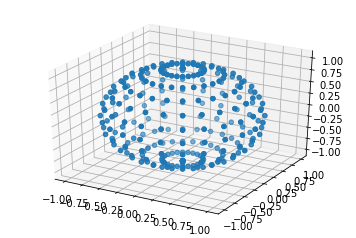

In [21]:
from mpl_toolkits.mplot3d import Axes3D

X = np.loadtxt('data/point_cloud.txt').T
figure = plt.figure(1)
ax = figure.add_subplot(111, projection='3d')
ax.scatter(X[0,:], X[1,:], X[2,:])
plt.show()

Now that we have the data, we need to perform PCA on them. Write a function that performs the above five steps and returns the data in the new subspace.

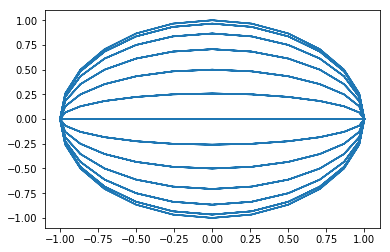

In [27]:
def PCA(X, k):
    Y = np.array(X)
    cov=np.cov(X)
    Eigenvalues,Eigenvectors=np.linalg.eigh(cov) #hernatian
    k_largest_eigvals=np.argsort(Eigenvalues)[::-1][0:k] #ascending order so we erverse
    w=Eigenvectors[:,k_largest_eigvals]
    Y=w.transpose().dot(X)
    # write your code here

    return Y

Y = PCA(X, 2)
plt.plot(Y[0,:], Y[1,:])
plt.show()

If you're interested, you can have a look at [this](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html) Python-based PCA tutorial for more details.